#  Classification and Clustering Analysis: An Analysis of Texts from the Gutenberg Corpora Using Unsupervised Feature Generation

<br>

Natural Language Processing (NLP) allows for the large scale analysis of subjective human language using machine learning.
Any industry that aggregates large amount of text through the internet stands to gain from the imlementation of NLP.
As the amount of text data increases exponentially, companies rely on machine learning techniques such as natural language processing to gather insights from this data that can help make decisions that lead to growth and profit.
A lot of this text data comes from multiple sources and is often disorganized, making it more difficult for supervised learning techniques to utilize.
Unsupervised learning methods allow for text data to be analyzed despite this disorganization.
Unsupervised learning achieves this by organizing the data in a way that allows it to be  better analyzed and by generating more versions of this text data that is more palatable to machine learning algorithms.
To better understand how unsupervised learning techniques can be utilized in NLP, I am interested in using unsupervised feature generation techniques to analyze texts from the Gutenberg Corpora written by various authors.

In this study, classification and clustering of excerpts from various texts was done following unsupervised feature generation.
Excerpts were classified as having been written by a specific author and excerpts were clustered based on author.
Clusters were analyzed based on their ability to group authors' excerpts together.
The different classification models were compared to better understand their ability to accurately predict author using multiple forms of statistical evaluation. 
The process used to undertake this study is as follows:


<br>

Initiation and Data Preprocessing
* Import Packages and Files
* Parse and Label Excerpts
* Vectorization and Feature Reduction

Clustering Analysis
* Selecting Appropriate Clustering Method
* Analyzing 10 Clusters Made Using K Means
* Analyzing Holdout Group

Modeling the Data 
* Using Bag of Words
* Using TF-IDF






## Initiation and Data Preprocessing

The data used in this study is taken from texts found in the Gutenberg corpora. 
Excerpts taken from the writing of the ten authors were used in clustering and classification.
Excerpts were labeled using the authors' last names: Chesterton, Bryant, Edgeworth, Austen, Whitman, Milton, Melville, Carroll, Shakespeare, and Burgess.
After labeling, two sets of features were created using bag of words and TF-IDF.
Both sets of features were reduced using singular value decomposition to reduce computational complexity and remove noise.

In [0]:
%%time

import math
import nltk
import spacy
import re
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib.mlab import PCA as mlabPCA
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.utils import resample
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
import textwrap

from datetime import datetime
from dateutil.parser import parse
from nltk.stem.porter import PorterStemmer
from nltk.corpus import gutenberg, stopwords



# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
pd.options.mode.chained_assignment = None

# Suppress Warnings
warnings.filterwarnings(
    action="ignore",
    module="sklearn"  
    )

# Set Plot Style
sns.set_style('darkgrid')

nltk.download('gutenberg')
!python -m spacy download en


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
CPU times: user 960 ms, sys: 204 ms, total: 1.16 s
Wall time: 3.55 s


In [0]:
%%time

## Import Files and Process the Raw Data.
print(gutenberg.fileids())

brown = gutenberg.raw('chesterton-brown.txt')
stories = gutenberg.raw('bryant-stories.txt')
parents = gutenberg.raw('edgeworth-parents.txt')
emma = gutenberg.raw('austen-emma.txt')
leaves = gutenberg.raw('whitman-leaves.txt')
paradise = gutenberg.raw('milton-paradise.txt')
moby_dick = gutenberg.raw('melville-moby_dick.txt')
alice = gutenberg.raw('carroll-alice.txt')
hamlet = gutenberg.raw('shakespeare-hamlet.txt')
busterbrown = gutenberg.raw('burgess-busterbrown.txt')

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
CPU times: user 4.1 ms, sys: 6.05 ms, total: 10.1 ms
Wall time: 11.6 ms


In [0]:
%%time

## Clean text data

def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text

brown = text_cleaner(brown[:60000])
stories = text_cleaner(stories[:60000])
parents = text_cleaner(parents[:60000])
emma = text_cleaner(emma[:60000])
leaves = text_cleaner(leaves[:60000])
paradise = text_cleaner(paradise[:60000])
moby_dick = text_cleaner(moby_dick[:60000])
alice = text_cleaner(alice[:60000])
hamlet = text_cleaner(hamlet[:60000])
busterbrown = text_cleaner(busterbrown[:60000])

CPU times: user 8.51 ms, sys: 2.9 ms, total: 11.4 ms
Wall time: 11.4 ms


In [0]:
%%time

## Extract ~ 100 Excerpts Each from All Texts, Totaling ~ 1000 Excerpts to Be Processed

all_texts = [ 
brown, stories, parents, emma,
leaves, paradise, moby_dick,
alice, hamlet, busterbrown
]

cleaned_excerpts = []
for texts in all_texts:
  cleaned_excerpts.append(textwrap.wrap(texts, len(texts)// 100))

CPU times: user 175 ms, sys: 3.99 ms, total: 179 ms
Wall time: 184 ms


In [0]:
%%time

## Parse the cleaned excerpts

nlp = spacy.load('en')

parsed_excerpts = []
for excerpts in cleaned_excerpts:
  single_text = []
  for excerpt in excerpts:
    single_text.append(nlp(excerpt))
  parsed_excerpts.append(single_text)


CPU times: user 21.8 s, sys: 169 ms, total: 21.9 s
Wall time: 21.9 s


In [0]:
%%time

## Convert Excerpts into Strings and Load them into Dataframes

all_sents = []
for excerpts in parsed_excerpts:
  single_text = []
  for excerpt in excerpts:
    single_text.append(str(excerpt))
  all_sents.append(pd.DataFrame(single_text).applymap(str).apply(lambda x: x + ' '))
  

CPU times: user 140 ms, sys: 7.91 ms, total: 148 ms
Wall time: 150 ms


In [0]:
%%time

## Assign Authors to Excerpts

author_names = [
"chesterton",
"bryant",
"edgeworth",
"austen",
"whitman",
"milton",
"melville",
"carroll",
"shakespeare",
"burgess"
]

for index_number in list(range(0,10)):
  all_sents[index_number]['author'] = author_names[index_number]

CPU times: user 7.19 ms, sys: 1.03 ms, total: 8.22 ms
Wall time: 7.76 ms


In [0]:
%%time

## Load Labeled Excerpts into single DataFrame

labeled_excerpts = pd.concat(all_sents)

print(labeled_excerpts.head())

                                                   0      author
0  I. The Absence of Mr Glass THE consulting-room...  chesterton
1  poetry. These things were there, in their plac...  chesterton
2  room was lined with as complete a set of Engli...  chesterton
3  ballads and the tables laden with drink and to...  chesterton
4  shot with grey, but growing thick and healthy;...  chesterton
CPU times: user 18.2 ms, sys: 1.03 ms, total: 19.2 ms
Wall time: 21.4 ms


In [0]:
%%time

## Vectorizing Text Data 

porter_stemmer = PorterStemmer()

def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words
  
# Using Bag Of Words

count_vectorizer = CountVectorizer(stop_words='english', tokenizer=stemming_tokenizer, max_features=1500)
X = count_vectorizer.fit_transform(labeled_excerpts.iloc[:,0])
df_bow = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

# Using TfIdf

tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, max_features=1500, use_idf=True)
X = tfidf_vectorizer.fit_transform(labeled_excerpts.iloc[:,0])
df_tfidf = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())


CPU times: user 4.66 s, sys: 21 ms, total: 4.68 s
Wall time: 4.68 s


In [0]:
%%time

## Feature Reduction For Clustering

svd= TruncatedSVD(20, random_state=42)
lsa = make_pipeline(svd, Normalizer(copy=False))
df_tfidf_u = lsa.fit_transform(df_tfidf)
df_tfidf_u = pd.DataFrame(df_tfidf_u)

author = labeled_excerpts.iloc[:,1]
df_tfidf_u['author'] = author.reset_index(inplace=False).drop('index',1)


CPU times: user 145 ms, sys: 38.9 ms, total: 184 ms
Wall time: 105 ms


In [0]:
%%time

## Feature Reduction For Modeling

svd= TruncatedSVD(20)
lsa = make_pipeline(svd, Normalizer(copy=False))
df_bow_s = lsa.fit_transform(df_bow)
df_tfidf_s = lsa.fit_transform(df_tfidf)

df_tfidf_s = pd.DataFrame(df_tfidf)
df_bow_s = pd.DataFrame(df_bow)

CPU times: user 321 ms, sys: 80.9 ms, total: 402 ms
Wall time: 209 ms


In [0]:
## Excerpt Labels Frequencies

labeled_excerpts.author.value_counts()

bryant         101
burgess        101
edgeworth      101
carroll        101
austen         101
melville       101
milton         101
shakespeare    101
whitman        101
chesterton     101
Name: author, dtype: int64

101 excerpts with about 600 characters each were extracted for each author.

In [0]:
for sents in all_sents:
  print(sents.iloc[1,1] + ':\n' + sents.iloc[1,0] + '\n')

chesterton:
poetry. These things were there, in their place; but one felt that they were never allowed out of their place. Luxury was there: there stood upon a special table eight or ten boxes of the best cigars; but they were built upon a plan so that the strongest were always nearest the wall and the mildest nearest the window. A tantalus containing three kinds of spirit, all of a liqueur excellence, stood always on this table of luxury; but the fanciful have asserted that the whisky, brandy, and rum seemed always to stand at the same level. Poetry was there: the left-hand corner of the 

bryant:
"It's the Rain, and I want to come in," said a soft, sad, little voice. "No, you can't come in," the little Tulip said. By and by she heard another little _tap, tap, tap_ on the window-pane. "Who is there?" she said. The same soft little voice answered, "It's the Rain, and I want to come in!" "No, you can't come in," said the little Tulip. Then it was very still for a long time. At last, the

Above is an example of what the excerpts from each author looked like prior to unsupervised feature generation.

## Clustering Analysis

Clustering was done on the TF-IDF vectorized features with 25% of the excerpts reserved as a holdout group to test the stability of the clusters.
Author labels were dropped prior to clustering so the excerpts would be clustered based on their contents as opposed to the pre-generated label.

In [0]:
%%time

## Store Data and Create Training and Testing Groups

X = df_tfidf_u

X_train, X_test= train_test_split(
    X,
    test_size=0.25,
    random_state=42)


CPU times: user 3.73 ms, sys: 51 µs, total: 3.78 ms
Wall time: 3.85 ms


### Selecting Appropriate Clustering Method

The appropriate clustering method was selected based on the number of clusters generated by a particular method and sillhouette scores.

In [0]:
%%time

bandwidth = estimate_bandwidth(X_train.drop('author',1), quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train.drop('author',1))

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated Mean Shift clusters: {}\n".format(n_clusters_))


Number of estimated Mean Shift clusters: 1

CPU times: user 76.9 ms, sys: 1.03 ms, total: 77.9 ms
Wall time: 82.2 ms


Mean Shift yielded a single cluster which would not be useful for analysis.

In [0]:
%%time

## Choosing Appropriate Number of Clusters

print('Silhouette scores for K Means:\n')
range_n_clusters = [7,8,9,10]
for n_clusters in range_n_clusters:
    print(str(n_clusters) + ' clusters: ' + str(silhouette_score(X_train.drop('author',1), KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_train.drop('author',1)))))
print('\n')

Silhouette scores for K Means:

7 clusters: 0.18654454819897806
8 clusters: 0.20824216402018073
9 clusters: 0.23012152834894517
10 clusters: 0.24786794516850177


CPU times: user 523 ms, sys: 326 ms, total: 849 ms
Wall time: 443 ms


K means was conducted for multiple numbers of clusters.
K means with 10 clusters was chosen because it yielded a sufficiently high sillhouette score and because having the same number of clusters as author labels would be beneficial to analysis.

### Analyzing Clusters

K-means generated labels were compared to the original author labels to analyze the ability of K-means to group the excerpts based on their content.

In [0]:
%%time

## Calculate predicted values.

y_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_train.drop('author',1))

CPU times: user 127 ms, sys: 72.9 ms, total: 200 ms
Wall time: 111 ms


In [0]:
%%time

## Create A Dataframe Using The Original Dataset and New Labels

df_kmeans = X_train
df_kmeans['labels'] = y_pred

## Split Results by New Labels

df_kmeans_0 = df_kmeans.loc[df_kmeans['labels'] == 0]
df_kmeans_1 = df_kmeans.loc[df_kmeans['labels'] == 1]
df_kmeans_2 = df_kmeans.loc[df_kmeans['labels'] == 2]
df_kmeans_3 = df_kmeans.loc[df_kmeans['labels'] == 3]
df_kmeans_4 = df_kmeans.loc[df_kmeans['labels'] == 4]
df_kmeans_5 = df_kmeans.loc[df_kmeans['labels'] == 5]
df_kmeans_6 = df_kmeans.loc[df_kmeans['labels'] == 6]
df_kmeans_7 = df_kmeans.loc[df_kmeans['labels'] == 7]
df_kmeans_8 = df_kmeans.loc[df_kmeans['labels'] == 8]
df_kmeans_9 = df_kmeans.loc[df_kmeans['labels'] == 9]

df_kmeans_list = [
df_kmeans_0,
df_kmeans_1,
df_kmeans_2,
df_kmeans_3,
df_kmeans_4,
df_kmeans_5,
df_kmeans_6,
df_kmeans_7,
df_kmeans_8,
df_kmeans_9
]


CPU times: user 11.2 ms, sys: 1.06 ms, total: 12.3 ms
Wall time: 11.2 ms


In [0]:
%%time

## Create DataFrame to Graph Clusters

df_kmeans_author_names = []
for names in author_names:
  df_kmeans_authors_per_cluster = []
  for group in df_kmeans_list:
    df_kmeans_authors_per_cluster.append(len(group['author'].loc[group['author'] == names]))
  df_kmeans_author_names.append(df_kmeans_authors_per_cluster )

cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9']

authors = {}
for index_number in list(range(0,10)):
    authors[author_names[index_number]] = df_kmeans_author_names[index_number]
    
df_authors_by_cluster = pd.DataFrame(authors, index = cluster_names)


CPU times: user 51.2 ms, sys: 5.01 ms, total: 56.2 ms
Wall time: 53.4 ms


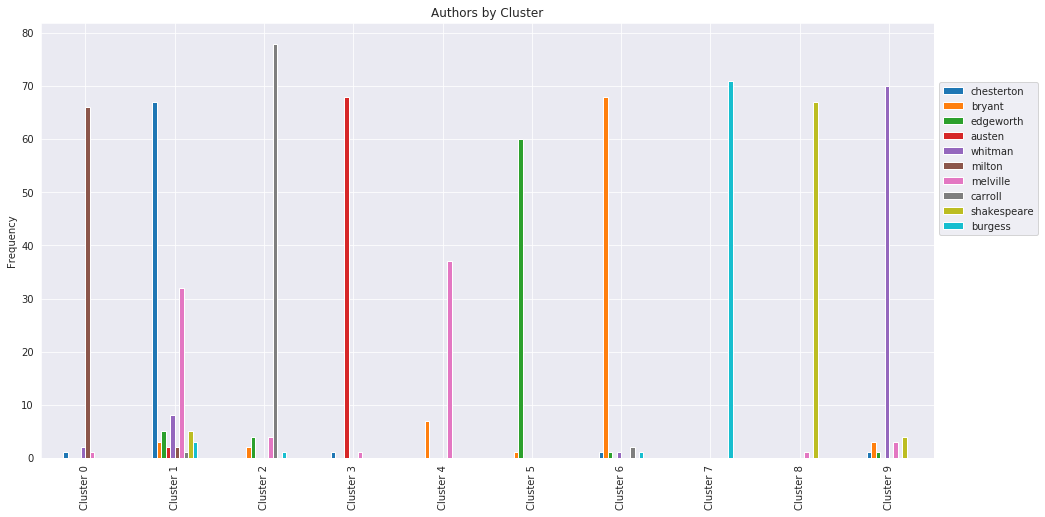

CPU times: user 635 ms, sys: 180 ms, total: 815 ms
Wall time: 586 ms


In [0]:
%%time

## Bar Graph for Authors

ax = df_authors_by_cluster.plot(kind='bar', title ="Authors by Cluster", figsize=(16, 8))
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Frequency")
plt.show()


Above is a bar graph visualizing the contents of individual clusters made using K-means. 
Cluster names refer to the numerical label assigned to each cluster and have no significance other than differentiating clusters from eachother.

The clusters primarily differentiated excerpts based on the author of the excerpts. 
This can be seen by the fact that the clusters each have a significantly higher number of excerpts from a single author. 
Bear in mind that the author names were not taken into account during the clustering process so these distinctions were made solely on the content of the excerpts. 

While each cluster contained a majority of an individual author's works there are some discrepancies that should be noted. 
A large portion of Melville's writings were grouped in the cluster mostly containing Chesterton's excerpts.
This implies that there were similarities between a lot of Melville's and Chesterton's excerpts that clustering had trouble discerning. 
The majority of excerpts that weren't clustered in the group with a majority of their author's excerpts fell into the Chesterton Cluster (cluster 1). However with the exception of Melville's excerpts this was a very small amount of non-Chesterton works in the cluster 1.

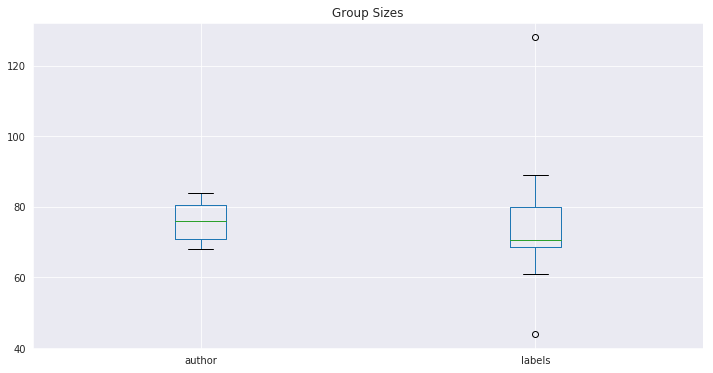

CPU times: user 257 ms, sys: 150 ms, total: 406 ms
Wall time: 237 ms


In [0]:
%%time

## Box Plot Visualizing Relative size of Author Labels And K Means Generated Labels

ax = pd.concat(
    [df_kmeans['author'].value_counts(),
    df_kmeans['labels'].value_counts()],
    1).plot(kind='box', figsize=(12, 6),
                                    title="Group Sizes"),
                                                
plt.show()

Above are boxplots reflecting the number of observations that had a specific author label or cluster generated label, respectively. 
These can be refered to as author group sizes and cluster sizes respectively. 
The median author group sizes and cluster sizes are relatively close.
However the range of the cluster group sizes is much larger with outliers in both directions.
This is reflective of discrepancies between author and cluster labels.
The high outlier in the cluster label sizes is the size of cluster 1, The cluster containing a majority of Chesterton's works.
This cluster is large because it also contains a significant amount of Melville's works. 
The low outlier in the cluster group sizes refer to the cluster 4, the cluster containing a majority of Melville's works. 
This Cluster is small because many of Melvilles works were grouped in cluster 1.



In [0]:
%%time

## Calculate Cluster Accuracy

print( "Percent of Author's Excerpts that were Clustered Together\n")

cluster_accuracy ={}
for item in df_kmeans_list:
    cluster_accuracy[item['author'].mode()[0]] = len(item['author'].loc[item['author'] == item['author'].mode()[0]])/len(df_kmeans['author'].loc[df_kmeans['author'] == item['author'].mode()[0]])

print(str(cluster_accuracy) +'\n')

Percent of Author's Excerpts that were Clustered Together

{'milton': 0.9705882352941176, 'chesterton': 0.9436619718309859, 'carroll': 0.9629629629629629, 'austen': 0.9714285714285714, 'melville': 0.46835443037974683, 'edgeworth': 0.8450704225352113, 'bryant': 0.8095238095238095, 'burgess': 0.9342105263157895, 'shakespeare': 0.881578947368421, 'whitman': 0.8641975308641975}

CPU times: user 21.6 ms, sys: 2.04 ms, total: 23.6 ms
Wall time: 28.1 ms


The above percentages refer to the percentage of author's excerpts that were grouped together in the cluster that contained a majority of that author's works. 
This can be percieved as a way to quantify the ability of the clustering method to group authors' excerpts together. 
The majority of the authors' excerpts were grouped together with the exception of Melville's excerpts; many of which were grouped with Chesterton's excerpts.
With the exception of Melville's works, clustering was able to group authors' excerpts with an accuracy of over 80%.

### Testing Holdout Group

The 25% holdout group was analyzed to better understand the stability of K-means when it comes to clustering the texts.

In [0]:
%%time

## Calculate predicted values.

y_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_test.drop('author',1))

CPU times: user 60.1 ms, sys: 881 µs, total: 61 ms
Wall time: 65.2 ms


In [0]:
%%time

## Create A Dataframe Using The Original Dataset and New Labels

df_kmeans = X_test
df_kmeans['labels'] = y_pred

## Split Results by New Labels

df_kmeans_0 = df_kmeans.loc[df_kmeans['labels'] == 0]
df_kmeans_1 = df_kmeans.loc[df_kmeans['labels'] == 1]
df_kmeans_2 = df_kmeans.loc[df_kmeans['labels'] == 2]
df_kmeans_3 = df_kmeans.loc[df_kmeans['labels'] == 3]
df_kmeans_4 = df_kmeans.loc[df_kmeans['labels'] == 4]
df_kmeans_5 = df_kmeans.loc[df_kmeans['labels'] == 5]
df_kmeans_6 = df_kmeans.loc[df_kmeans['labels'] == 6]
df_kmeans_7 = df_kmeans.loc[df_kmeans['labels'] == 7]
df_kmeans_8 = df_kmeans.loc[df_kmeans['labels'] == 8]
df_kmeans_9 = df_kmeans.loc[df_kmeans['labels'] == 9]

df_kmeans_list = [
df_kmeans_0,
df_kmeans_1,
df_kmeans_2,
df_kmeans_3,
df_kmeans_4,
df_kmeans_5,
df_kmeans_6,
df_kmeans_7,
df_kmeans_8,
df_kmeans_9
]

CPU times: user 13 ms, sys: 0 ns, total: 13 ms
Wall time: 12.5 ms


In [0]:
%%time

## Create DataFrame to Graph Clusters

df_kmeans_author_names = []
for names in author_names:
  df_kmeans_authors_per_cluster = []
  for group in df_kmeans_list:
    df_kmeans_authors_per_cluster.append(len(group['author'].loc[group['author'] == names]))
  df_kmeans_author_names.append(df_kmeans_authors_per_cluster )

cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9']

authors = {}
for index_number in list(range(0,10)):
    authors[author_names[index_number]] = df_kmeans_author_names[index_number]
    
df_authors_by_cluster = pd.DataFrame(authors, index = cluster_names)

CPU times: user 58.7 ms, sys: 1.98 ms, total: 60.7 ms
Wall time: 60.2 ms


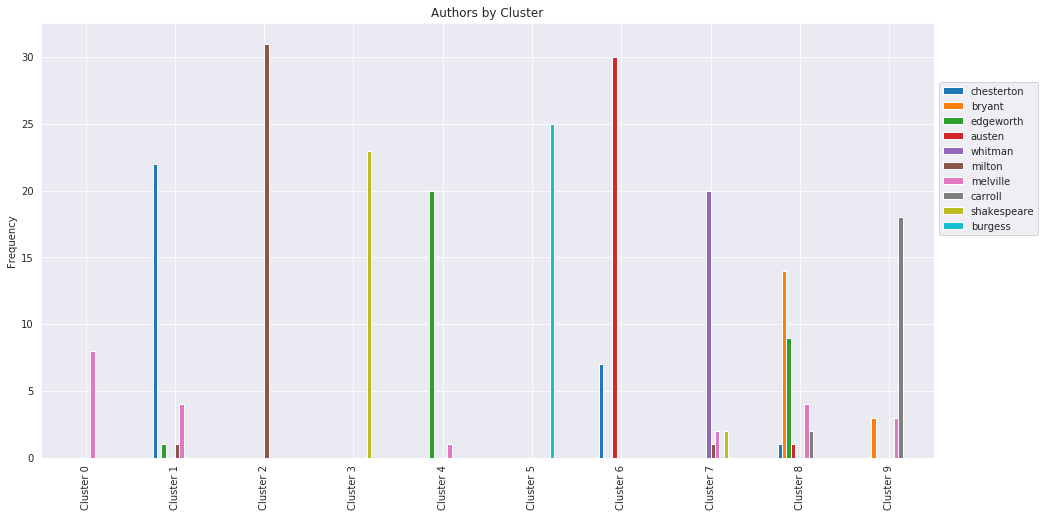

CPU times: user 719 ms, sys: 185 ms, total: 904 ms
Wall time: 676 ms


In [0]:
%%time

## Bar Graph for Authors

ax = df_authors_by_cluster.plot(kind='bar', title ="Authors by Cluster", figsize=(16, 8))
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Frequency")
plt.show()



Above is a bar graph visualizing the contents of individual clusters made using the K-means on the holdout group. Cluster names refer to the numerical label assigned to each cluster and have no significance other than differentiating clusters from eachother.

The clusters still primarily differentiated excerpts based on the author of the excerpts. 
This can be seen by the fact that the clusters each have a significantly higher number of excerpts from a single author. 

While each cluster was able to contain a majority of a individual author's works in the holdout group there are more discrepancies than in the original clusters. 
As with the original clusters, a large portion of Melville's excerpts were grouped in the cluster containing mostly Chesterton's excerpts.
A lot of Edgeworth's excerpts were also grouped with Bryant's excerpts in cluster 8 as well.

In [0]:
%%time

## Calculate Cluster Accuracy

print( "Percent of Author's Excerpts that were Clustered Together\n")

cluster_accuracy ={}
for item in df_kmeans_list:
    cluster_accuracy[item['author'].mode()[0]] = len(item['author'].loc[item['author'] == item['author'].mode()[0]])/len(df_kmeans['author'].loc[df_kmeans['author'] == item['author'].mode()[0]])

print(str(cluster_accuracy) +'\n')

Percent of Author's Excerpts that were Clustered Together

{'melville': 0.36363636363636365, 'chesterton': 0.7333333333333333, 'milton': 0.9393939393939394, 'shakespeare': 0.92, 'edgeworth': 0.6666666666666666, 'burgess': 1.0, 'austen': 0.967741935483871, 'whitman': 1.0, 'bryant': 0.8235294117647058, 'carroll': 0.9}

CPU times: user 25.1 ms, sys: 1.14 ms, total: 26.2 ms
Wall time: 28.6 ms


As can be seen by the cluster percentages and bar graph, the holdout group clusters were less stable than the original clusters (especially when it came to grouping Edgeworth's excerpts).
Despite the drop in stability, the holdout group clusters each still contained a majority if a single actor's excerpts.
Overall, clustering using K-means was reliably able to differentiate the text samples of different authors.

## Modeling the Data using Bag of Words



In [0]:
%%time

## Establish variables based on original features to be used for modeling

x = df_bow_s
y = labeled_excerpts.iloc[:,1]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=20)

CPU times: user 6.49 ms, sys: 4.9 ms, total: 11.4 ms
Wall time: 17.2 ms


### Naive Bayes

In [0]:
%%time

## train and fit model

bnb = BernoulliNB().fit(x_train, y_train)

CPU times: user 18.6 ms, sys: 15 ms, total: 33.7 ms
Wall time: 32.8 ms


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(bnb.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(bnb, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, bnb.predict(x_test)))+'\n')

print(classification_report(y_test, bnb.predict(x_test)))

accuracy score:
0.932806324110672

cross validation:
[0.72727273 0.57692308 0.65306122 0.63265306 0.6875    ]

confusion matrix:
[[33  0  0  0  0  1  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  2  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  2  0  0  0 15  0  0  0  0]
 [ 0  0  0  1  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  4 30  0  1]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  4  0  2  0  0 26]]

              precision    recall  f1-score   support

      austen       1.00      0.97      0.99        34
      bryant       0.93      1.00      0.96        26
     burgess       1.00      1.00      1.00        20
     carroll       0.96      0.92      0.94        25
  chesterton       0.84      1.00      0.91        21
   edgeworth       0.94      0.88      0.91        17
    melville       0.65      0.94      0.77        16
      milton       1.00      0.86      0.92        35
 shakespeare       1.00      1.00      1.00        2

### K Nearest Neighbors 

In [0]:
%%time

## train and fit model

knn = neighbors.KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)

CPU times: user 30.4 ms, sys: 1.02 ms, total: 31.4 ms
Wall time: 31.4 ms


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(knn.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(knn, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, knn.predict(x_test)))+'\n')

print(classification_report(y_test, knn.predict(x_test)))

accuracy score:
0.6561264822134387

cross validation:
[0.65454545 0.53846154 0.46938776 0.44897959 0.58333333]

confusion matrix:
[[26  0  0  0  1  2  3  1  0  1]
 [ 0 19  0  0  2  1  4  0  0  0]
 [ 0  0 17  0  1  0  2  0  0  0]
 [ 0  0  0 11  2  3  8  1  0  0]
 [ 0  0  0  0 13  0  5  2  0  1]
 [ 0  1  0  0  1 13  1  1  0  0]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  1  0 13 21  0  0]
 [ 0  0  0  0  2  1  3  3 15  3]
 [ 0  0  0  0  2  0 15  0  0 15]]

              precision    recall  f1-score   support

      austen       1.00      0.76      0.87        34
      bryant       0.95      0.73      0.83        26
     burgess       1.00      0.85      0.92        20
     carroll       1.00      0.44      0.61        25
  chesterton       0.52      0.62      0.57        21
   edgeworth       0.65      0.76      0.70        17
    melville       0.23      1.00      0.37        16
      milton       0.72      0.60      0.66        35
 shakespeare       1.00      0.56      0.71        

### Decision Tree

In [0]:
%%time

## train and fit model

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=15,
    max_depth=25,
    ).fit(x_train, y_train)

CPU times: user 12.2 ms, sys: 12 µs, total: 12.2 ms
Wall time: 17.8 ms


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(decision_tree.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(decision_tree, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, decision_tree.predict(x_test)))+'\n')

print(classification_report(y_test, decision_tree.predict(x_test)))

accuracy score:
0.43478260869565216

cross validation:
[0.23636364 0.44230769 0.20408163 0.24489796 0.3125    ]

confusion matrix:
[[17  0  0  0  7  3  0  1  0  6]
 [ 2 14  2  2  5  0  1  0  0  0]
 [ 1  1 13  3  2  0  0  0  0  0]
 [ 0  4  2  9  3  2  0  0  2  3]
 [ 5  3  0  1  8  1  1  0  0  2]
 [ 3  4  0  0  1  7  0  0  0  2]
 [ 0  4  1  1  2  0  2  1  0  5]
 [ 2  0  0  1  4  0  0 12  1 15]
 [ 1  0  1  3  4  1  1  1  8  7]
 [ 2  2  0  0  0  1  2  4  1 20]]

              precision    recall  f1-score   support

      austen       0.52      0.50      0.51        34
      bryant       0.44      0.54      0.48        26
     burgess       0.68      0.65      0.67        20
     carroll       0.45      0.36      0.40        25
  chesterton       0.22      0.38      0.28        21
   edgeworth       0.47      0.41      0.44        17
    melville       0.29      0.12      0.17        16
      milton       0.63      0.34      0.44        35
 shakespeare       0.67      0.30      0.41       

### Random Forest

In [0]:
%%time

## train and fit model

rf = ensemble.RandomForestClassifier()

parameters = { 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy'],
              'max_depth': list(np.arange(85, 111, 5)), 
              'min_samples_split': list(np.arange(3, 12, 2))
             }

acc_scorer = make_scorer(accuracy_score)

rfc = GridSearchCV(rf, parameters, scoring=acc_scorer).fit(x_train,  y_train)

print(rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 105, 'max_features': 'sqrt', 'min_samples_split': 7}
CPU times: user 8.5 s, sys: 35.1 ms, total: 8.53 s
Wall time: 8.54 s


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(rfc.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(rfc, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, rfc.predict(x_test)))+'\n')

print(classification_report(y_test, rfc.predict(x_test)))

accuracy score:
0.8063241106719368

cross validation:
[0.65454545 0.65384615 0.55102041 0.69387755 0.70833333]

confusion matrix:
[[31  1  0  0  0  2  0  0  0  0]
 [ 0 21  0  0  1  2  2  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 1  1  0 20  2  0  0  0  0  1]
 [ 0  0  0  1 15  3  1  0  0  1]
 [ 0  4  0  0  1 11  1  0  0  0]
 [ 1  0  0  2  0  0 12  0  0  1]
 [ 0  0  0  0  1  0  3 27  0  4]
 [ 0  0  1  1  0  0  1  1 21  2]
 [ 0  2  0  0  0  2  1  0  1 26]]

              precision    recall  f1-score   support

      austen       0.94      0.91      0.93        34
      bryant       0.72      0.81      0.76        26
     burgess       0.95      1.00      0.98        20
     carroll       0.83      0.80      0.82        25
  chesterton       0.75      0.71      0.73        21
   edgeworth       0.55      0.65      0.59        17
    melville       0.57      0.75      0.65        16
      milton       0.96      0.77      0.86        35
 shakespeare       0.95      0.78      0.86        

### Gradient Boost

In [0]:
%%time

## train and fit model

cl = ensemble.GradientBoostingClassifier()

parameters = { 
              'n_estimators': list(np.arange(200, 301, 50)),
              'max_depth': list(range(1,7)),
             }

acc_scorer = make_scorer(accuracy_score)

clf = GridSearchCV(cl, parameters, scoring=acc_scorer).fit(x_train,  y_train)

## Show Best Parameters
print(clf.best_params_)

{'max_depth': 3, 'n_estimators': 250}
CPU times: user 18min 10s, sys: 118 ms, total: 18min 10s
Wall time: 18min 10s


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(clf.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(clf, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, clf.predict(x_test)))+'\n')

print(classification_report(y_test, clf.predict(x_test)))

accuracy score:
0.8695652173913043

cross validation:
[0.74545455 0.80769231 0.71428571 0.69387755 0.72916667]

confusion matrix:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  1  1  0  0]
 [ 0  0 19  0  0  0  1  0  0  0]
 [ 0  0  0 21  0  0  4  0  0  0]
 [ 0  1  0  0 16  2  2  0  0  0]
 [ 0  1  0  0  0 16  0  0  0  0]
 [ 0  1  0  0  1  0 12  0  0  2]
 [ 0  0  0  0  0  0  1 30  0  4]
 [ 0  0  0  0  0  0  1  0 24  2]
 [ 2  0  0  0  0  0  5  1  0 24]]

              precision    recall  f1-score   support

      austen       0.94      1.00      0.97        34
      bryant       0.89      0.92      0.91        26
     burgess       1.00      0.95      0.97        20
     carroll       1.00      0.84      0.91        25
  chesterton       0.94      0.76      0.84        21
   edgeworth       0.89      0.94      0.91        17
    melville       0.44      0.75      0.56        16
      milton       0.94      0.86      0.90        35
 shakespeare       1.00      0.89      0.94        

### Logistic Regression 

In [0]:
%%time

## train and fit model

lr = LogisticRegression(fit_intercept=False).fit(x_train, y_train)

CPU times: user 90.7 ms, sys: 0 ns, total: 90.7 ms
Wall time: 93.5 ms


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(lr.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(lr, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, lr.predict(x_test)))+'\n')

print(classification_report(y_test, lr.predict(x_test)))

accuracy score:
0.9565217391304348

cross validation:
[0.81818182 0.92307692 0.85714286 0.91836735 0.89583333]

confusion matrix:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  1  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  1  0  0  0  0 14  0  0  1]
 [ 0  0  0  0  1  0  1 32  0  1]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 1  0  0  0  0  0  4  0  0 27]]

              precision    recall  f1-score   support

      austen       0.97      1.00      0.99        34
      bryant       0.96      1.00      0.98        26
     burgess       1.00      1.00      1.00        20
     carroll       1.00      0.96      0.98        25
  chesterton       0.95      1.00      0.98        21
   edgeworth       1.00      1.00      1.00        17
    melville       0.70      0.88      0.78        16
      milton       1.00      0.91      0.96        35
 shakespeare       1.00      1.00      1.00        

### Neural Network

In [0]:
%%time

## train and fit model

mlp = MLPClassifier(hidden_layer_sizes=(100,)).fit(x_train, y_train)

CPU times: user 4.68 s, sys: 1.88 s, total: 6.56 s
Wall time: 3.3 s


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(mlp.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(mlp, x_test, y_test, cv=5))+'\n')


print("confusion matrix:\n" + str(confusion_matrix(y_test, mlp.predict(x_test)))+'\n')

print(classification_report(y_test, mlp.predict(x_test)))

accuracy score:
0.9683794466403162

cross validation:
[0.90909091 0.88461538 0.85714286 0.89795918 0.89583333]

confusion matrix:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  1  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  1]
 [ 0  0  0  0  0  0  1 32  0  2]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  1  0  1  1  0 29]]

              precision    recall  f1-score   support

      austen       1.00      1.00      1.00        34
      bryant       1.00      1.00      1.00        26
     burgess       1.00      1.00      1.00        20
     carroll       1.00      0.96      0.98        25
  chesterton       0.95      1.00      0.98        21
   edgeworth       1.00      1.00      1.00        17
    melville       0.83      0.94      0.88        16
      milton       0.97      0.91      0.94        35
 shakespeare       1.00      1.00      1.00        




The neural network had the best performance out of all of the models run with features generated by bag of words.
Cross validation showed few signs of overfitting with this model. 
The strength of this model when it comes to making predictions using this data comes from its ability to generate predictions based on individual records and adjusting its weights based on the results. 
This is especially useful for text data where similar features may have different implications based on the prescence of other features in the same record.
Naive bayes had similar accuracy scores but strong signs of overfitting. KNN and the decision tree performed poorly with this data. The model types likely lacked the power to discern between various groups of features.
Using bag of words may be advantageous in situations where texts are smaller and more domain specific. This is because high frequency features in these situations may not be indicative of non-meaningful variance. 




## Modeling the Data using TF-IDF



In [0]:
%%time

## Establish variables based on original features to be used for modeling

x = df_tfidf_s
y = labeled_excerpts.iloc[:,1]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=20)

CPU times: user 5.85 ms, sys: 2.01 ms, total: 7.86 ms
Wall time: 8.38 ms


### Naive Bayes

In [0]:
%%time

## train and fit model

bnb = BernoulliNB().fit(x_train, y_train)

CPU times: user 22.2 ms, sys: 4 ms, total: 26.2 ms
Wall time: 24.1 ms


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(bnb.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(bnb, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, bnb.predict(x_test)))+'\n')

print(classification_report(y_test, bnb.predict(x_test)))

accuracy score:
0.932806324110672

cross validation:
[0.72727273 0.57692308 0.65306122 0.63265306 0.6875    ]

confusion matrix:
[[33  0  0  0  0  1  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  2  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  2  0  0  0 15  0  0  0  0]
 [ 0  0  0  1  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  4 30  0  1]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  4  0  2  0  0 26]]

              precision    recall  f1-score   support

      austen       1.00      0.97      0.99        34
      bryant       0.93      1.00      0.96        26
     burgess       1.00      1.00      1.00        20
     carroll       0.96      0.92      0.94        25
  chesterton       0.84      1.00      0.91        21
   edgeworth       0.94      0.88      0.91        17
    melville       0.65      0.94      0.77        16
      milton       1.00      0.86      0.92        35
 shakespeare       1.00      1.00      1.00        2

### K Nearest Neighbors 

In [0]:
%%time

## train and fit model

knn = neighbors.KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)

CPU times: user 26.1 ms, sys: 1 ms, total: 27.2 ms
Wall time: 29.9 ms


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(knn.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(knn, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, knn.predict(x_test)))+'\n')

print(classification_report(y_test, knn.predict(x_test)))

accuracy score:
0.9011857707509882

cross validation:
[0.8        0.84615385 0.81632653 0.79591837 0.83333333]

confusion matrix:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  1  0 24  0  0  0  0  0  0]
 [ 1  0  0  1 18  0  0  0  1  0]
 [ 0  1  0  0  0 16  0  0  0  0]
 [ 0  2  0  0  1  1 12  0  0  0]
 [ 0  0  0  0  0  0  1 31  1  2]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 4  1  1  0  1  0  3  0  2 20]]

              precision    recall  f1-score   support

      austen       0.87      1.00      0.93        34
      bryant       0.84      1.00      0.91        26
     burgess       0.95      1.00      0.98        20
     carroll       0.96      0.96      0.96        25
  chesterton       0.90      0.86      0.88        21
   edgeworth       0.94      0.94      0.94        17
    melville       0.75      0.75      0.75        16
      milton       1.00      0.89      0.94        35
 shakespeare       0.87      1.00      0.93        

### Decision Tree

In [0]:
%%time

## train and fit model

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=15,
    max_depth=25,
    ).fit(x_train, y_train)

CPU times: user 13.9 ms, sys: 1 ms, total: 14.9 ms
Wall time: 16.3 ms


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(decision_tree.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(decision_tree, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, decision_tree.predict(x_test)))+'\n')

print(classification_report(y_test, decision_tree.predict(x_test)))

accuracy score:
0.39920948616600793

cross validation:
[0.21818182 0.42307692 0.42857143 0.42857143 0.3125    ]

confusion matrix:
[[18  1  1  2  4  3  0  3  0  2]
 [ 1  7  0 11  0  2  0  1  1  3]
 [ 1  1 15  0  1  1  0  0  0  1]
 [ 0  2  1 13  3  4  1  0  1  0]
 [ 0  0  1  5  2  5  3  3  0  2]
 [ 0  2  0  3  2  9  0  0  0  1]
 [ 3  1  0  1  2  2  4  2  0  1]
 [ 1  0  1  3  0  2  2 14  1 11]
 [ 3  1  1  1  1  3  0  4  9  4]
 [ 6  0  1  1  1  2  4  7  0 10]]

              precision    recall  f1-score   support

      austen       0.55      0.53      0.54        34
      bryant       0.47      0.27      0.34        26
     burgess       0.71      0.75      0.73        20
     carroll       0.33      0.52      0.40        25
  chesterton       0.12      0.10      0.11        21
   edgeworth       0.27      0.53      0.36        17
    melville       0.29      0.25      0.27        16
      milton       0.41      0.40      0.41        35
 shakespeare       0.75      0.33      0.46       

### Random Forest

In [0]:
%%time

## train and fit model

rf = ensemble.RandomForestClassifier()

parameters = { 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy'],
              'max_depth': list(np.arange(85, 111, 5)), 
              'min_samples_split': list(np.arange(3, 12, 2))
             }

acc_scorer = make_scorer(accuracy_score)

rfc = GridSearchCV(rf, parameters, scoring=acc_scorer).fit(x_train,  y_train)

print(rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_split': 11}
CPU times: user 10.6 s, sys: 53 ms, total: 10.7 s
Wall time: 10.7 s


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(rfc.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(rfc, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, rfc.predict(x_test)))+'\n')

print(classification_report(y_test, rfc.predict(x_test)))

accuracy score:
0.7786561264822134

cross validation:
[0.67272727 0.63461538 0.67346939 0.65306122 0.70833333]

confusion matrix:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 18  2  0  3  1  1  0  0  1]
 [ 0  1 18  1  0  0  0  0  0  0]
 [ 0  3  0 20  0  1  1  0  0  0]
 [ 3  0  0  0 13  0  4  1  0  0]
 [ 0  3  0  0  1 12  1  0  0  0]
 [ 1  0  0  1  0  0 11  0  0  3]
 [ 0  0  0  0  0  0  1 27  1  6]
 [ 0  0  0  0  0  0  0  2 21  4]
 [ 0  2  0  1  1  0  3  0  2 23]]

              precision    recall  f1-score   support

      austen       0.89      1.00      0.94        34
      bryant       0.67      0.69      0.68        26
     burgess       0.90      0.90      0.90        20
     carroll       0.87      0.80      0.83        25
  chesterton       0.72      0.62      0.67        21
   edgeworth       0.86      0.71      0.77        17
    melville       0.50      0.69      0.58        16
      milton       0.90      0.77      0.83        35
 shakespeare       0.88      0.78      0.82        

### Gradient Boost

In [0]:
%%time

## train and fit model

cl = ensemble.GradientBoostingClassifier()

parameters = { 
              'n_estimators': list(np.arange(200, 301, 50)),
              'max_depth': list(range(1,7))
             }

acc_scorer = make_scorer(accuracy_score)

clf = GridSearchCV(cl, parameters, scoring=acc_scorer).fit(x_train,  y_train)

## Show Best Parameters
print(clf.best_params_)

{'max_depth': 4, 'n_estimators': 200}
CPU times: user 17min 37s, sys: 86.9 ms, total: 17min 37s
Wall time: 17min 37s


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(clf.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(clf, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, clf.predict(x_test)))+'\n')

print(classification_report(y_test, clf.predict(x_test)))

accuracy score:
0.8616600790513834

cross validation:
[0.65454545 0.73076923 0.71428571 0.73469388 0.8125    ]

confusion matrix:
[[32  0  0  2  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  1  0  0  0]
 [ 0  1 19  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  3  0  0  0]
 [ 0  1  0  0 16  3  1  0  0  0]
 [ 0  1  0  0  0 16  0  0  0  0]
 [ 0  1  0  0  1  0 13  0  0  1]
 [ 0  0  0  0  0  0  3 29  0  3]
 [ 0  0  0  0  1  0  0  0 24  2]
 [ 0  1  0  0  1  0  8  0  0 22]]

              precision    recall  f1-score   support

      austen       1.00      0.94      0.97        34
      bryant       0.83      0.96      0.89        26
     burgess       1.00      0.95      0.97        20
     carroll       0.92      0.88      0.90        25
  chesterton       0.84      0.76      0.80        21
   edgeworth       0.84      0.94      0.89        17
    melville       0.45      0.81      0.58        16
      milton       1.00      0.83      0.91        35
 shakespeare       1.00      0.89      0.94        

### Logistic Regression 

In [0]:
%%time

## train and fit model

lr = LogisticRegression(fit_intercept=False).fit(x_train, y_train)

CPU times: user 43.5 ms, sys: 996 µs, total: 44.5 ms
Wall time: 47 ms


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(lr.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(lr, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, lr.predict(x_test)))+'\n')

print(classification_report(y_test, lr.predict(x_test)))

accuracy score:
0.9486166007905138

cross validation:
[0.83636364 0.90384615 0.83673469 0.83673469 0.89583333]

confusion matrix:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0 20  1  0  0  0  0]
 [ 0  1  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  1 13  0  0  2]
 [ 0  0  0  0  0  0  0 33  0  2]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 2  1  0  0  1  0  2  0  0 26]]

              precision    recall  f1-score   support

      austen       0.94      1.00      0.97        34
      bryant       0.93      1.00      0.96        26
     burgess       1.00      1.00      1.00        20
     carroll       1.00      1.00      1.00        25
  chesterton       0.95      0.95      0.95        21
   edgeworth       0.89      0.94      0.91        17
    melville       0.87      0.81      0.84        16
      milton       1.00      0.94      0.97        35
 shakespeare       1.00      1.00      1.00        

### Neural Network

In [0]:
%%time

## train and fit model

mlp = MLPClassifier(hidden_layer_sizes=(100,)).fit(x_train, y_train)

CPU times: user 7.94 s, sys: 2.79 s, total: 10.7 s
Wall time: 5.39 s


In [0]:
%%time

## Model Evaluation

print("accuracy score:\n" + str(mlp.score(x_test, y_test))+'\n')

print("cross validation:\n" + str(cross_val_score(mlp, x_test, y_test, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, mlp.predict(x_test)))+'\n')

print(classification_report(y_test, mlp.predict(x_test)))

accuracy score:
0.9604743083003953

cross validation:
[0.87272727 0.82692308 0.85714286 0.89795918 0.91666667]

confusion matrix:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  1]
 [ 0  0  0  0  0  0  1 32  0  2]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  1  0  0  3  0  2  0  0 26]]

              precision    recall  f1-score   support

      austen       1.00      1.00      1.00        34
      bryant       0.96      1.00      0.98        26
     burgess       1.00      1.00      1.00        20
     carroll       1.00      1.00      1.00        25
  chesterton       0.88      1.00      0.93        21
   edgeworth       1.00      1.00      1.00        17
    melville       0.83      0.94      0.88        16
      milton       1.00      0.91      0.96        35
 shakespeare       1.00      1.00      1.00        



The neural network had the best performance out of all of the models run with features generated by TF-IDF. The neural network with TF-IDF features also outperformed the neural network with bag of words features, making it the strongest supervised model in the study.
Cross validation showed few signs of overfitting with this model. 
TF-IDF gave the neural network more accurate weights of the representativeness of each feature allowing for the neural network to make predictions with less error. 
This helped the processing of the text data for the neural network by reducing noise created by frequent but uninformative features. 
The accuracy and cross validation scores were higher in geneneral for the TD-IDF models but the same trends existed between model most types with the exception of KNN. KNN with TF-IDF yielded significantly higher accuracy than KNN with bag of words.
The reduction of noise that this form of feature selection offers likely allowed KNN to process observations using more representative neighboring datapoints.



## Analysis and Conclusion

Both classification and clustering were able to reliably label the excerpts by author in this study.
The neural network built on TF-IDF features, the best performing model, had over a 95% accuracy and regularly labeled each author's excerpts correctly over 80% of the time.
Clustering was able to yield high accuracy as well, grouping over 80% of each author's excerpts together with the exception of Melville's excerpts. Melville's excerpts was consistently the least consistently labeled across all models, implying that discrepancies in its labeling are due to the data itsself rather than the method of feature preparation and classification. 
Modeling did have the advantage of being more accurate but clustering was able to show strong reliability even in the abscence of labels.

This established the relative ability of clustering and modeling unsupervised learning generated features to classify the authors of writing samples.
By being able to reliably label data using unsupervised and supervised methods, large amounts of text can be analyzed, even in the abscence of pre-established labels. A condition often found in real-world data.
The next step in using this data to discern the source of the text data would be to collect more text from different authors and more data about the context in which the text was generated. Afterwards the study can be expanded to include different types of feature preparation.

Understanding how to better utilize unsupervised modeling techniques to predict author, will give insight as to what kind of people are generating different types of texts. 
This can be practically be applied to consumer data such as reviews and other types of user generated text.
This can allow for more direct marketing to users or changes in products that better match how services are used. 
Being able to utilize readily available data that isn't always processed and labeled, allows for revenue generating decisions to be made at very little cost to stakeholders.

